# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [31]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [64]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

In [65]:
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [201]:
birddata.date_time

0        2013-08-15 00:18:08+00
1        2013-08-15 00:48:07+00
2        2013-08-15 01:17:58+00
3        2013-08-15 01:47:51+00
4        2013-08-15 02:17:42+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 61920, dtype: object

In [48]:
birddata.date_time[0][0:10]

'2013-08-15'

**A VERY IMPORTANT NOTE:** IF YOU WANT TO GROUP DATA BY ITS DAYS, USE **.DT.DATE**

In [178]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [179]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

**Try to understand the following code**

In [130]:
print(nico_daily_speed.index[0])

key = pd.to_datetime('2013-08-15').date()
nico_daily_speed.index[0] == key

2013-08-15


True

Now apply this to find mean altitude of the birds on 2013-09-12

In [180]:
m_a_p = mean_altitudes_perday

for i in range(len(m_a_p)):
    if m_a_p.index[i] == pd.to_datetime('2013-09-12').date():
        print(i, m_a_p[i])

28 75.64609053497942


### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [83]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name","date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()


In [88]:
mean_altitudes_perday["Eric"]

date
2013-08-15     74.988095
2013-08-16    127.773810
2013-08-17    125.890244
2013-08-18    121.353659
2013-08-19    134.928571
                 ...    
2014-04-26     20.717391
2014-04-27     48.790698
2014-04-28     27.829787
2014-04-29     17.425532
2014-04-30     38.791667
Name: altitude, Length: 252, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

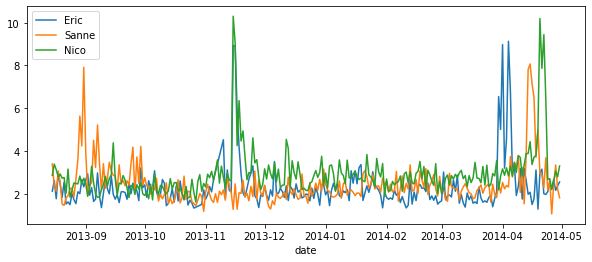

In [181]:
import matplotlib.pyplot as plt

grouped_birdday.altitude.mean()

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

plt.figure(figsize = (10,4))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [183]:
nico_daily_speed[232]

2.8324654508684057

In [168]:
for i in range(len(nico_daily_speed)):
    if nico_daily_speed.index[i] == pd.to_datetime('2014-04-04').date():
        print(i, nico_daily_speed[i])

232 2.8324654508684057
